## About Dataset

The online hotel reservation channels have dramatically changed booking possibilities and customers’ behavior. A significant number of hotel reservations are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with.

Can you predict if the customer is going to honor the reservation or cancel it?

In [1]:
import pandas as pd
import numpy as np

In [2]:
raw_data = pd.read_csv('C:/Users/arkad/Desktop/Pliki_do_analizy/hotel_reservation_predicitions/Hotel Reservations.csv')

In [3]:
raw_data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


### Checking information about dataset: Null amount, unique values, statistic description

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [5]:
raw_data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [6]:
raw_data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


In [7]:
raw_data['booking_status'].value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

In [8]:
raw_data['market_segment_type'].value_counts()

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

In [9]:
raw_data['room_type_reserved'].value_counts()

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

In [10]:
raw_data['type_of_meal_plan'].value_counts()

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

In [11]:
type_of_col=[]
for i in raw_data.columns:
    if raw_data[i].dtype == 'object':
        type_of_col.append(i)
type_of_col

['Booking_ID',
 'type_of_meal_plan',
 'room_type_reserved',
 'market_segment_type',
 'booking_status']

## Copy of Dataset

In [12]:
df = raw_data.copy()

In [13]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [14]:
df.shape

(36275, 19)

In [15]:
df.drop(['Booking_ID'],axis=1, inplace=True)

In [16]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [17]:
df = pd.get_dummies(df,drop_first=True)

In [18]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,booking_status_Not_Canceled
0,2,0,1,2,0,224,2017,10,2,0,...,0,0,0,0,0,0,0,1,0,1
1,2,0,2,3,0,5,2018,11,6,0,...,0,0,0,0,0,0,0,0,1,1
2,1,0,2,1,0,1,2018,2,28,0,...,0,0,0,0,0,0,0,0,1,0
3,2,0,0,2,0,211,2018,5,20,0,...,0,0,0,0,0,0,0,0,1,0
4,2,0,1,1,0,48,2018,4,11,0,...,0,0,0,0,0,0,0,0,1,0


In [19]:
df.dtypes

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
required_car_parking_space                int64
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
type_of_meal_plan_Meal Plan 2             uint8
type_of_meal_plan_Meal Plan 3             uint8
type_of_meal_plan_Not Selected            uint8
room_type_reserved_Room_Type 2            uint8
room_type_reserved_Room_Type 3            uint8
room_type_reserved_Room_Type 4            uint8
room_type_reserved_Room_Type 5          

### Data type change

In [20]:
for i in df.columns:
    if df[i].dtype =='uint8':
        df[i]=df[i].astype(int)
df.dtypes

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
required_car_parking_space                int64
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
type_of_meal_plan_Meal Plan 2             int32
type_of_meal_plan_Meal Plan 3             int32
type_of_meal_plan_Not Selected            int32
room_type_reserved_Room_Type 2            int32
room_type_reserved_Room_Type 3            int32
room_type_reserved_Room_Type 4            int32
room_type_reserved_Room_Type 5          

### Checking correlation with 'booking_status_Not_Canceled'

In [21]:
df.corrwith(df['booking_status_Not_Canceled'])*100

no_of_adults                             -8.692030
no_of_children                           -3.307782
no_of_weekend_nights                     -6.156254
no_of_week_nights                        -9.299601
required_car_parking_space                8.618528
lead_time                               -43.853792
arrival_year                            -17.952889
arrival_month                             1.123305
arrival_date                             -1.062905
repeated_guest                           10.728664
no_of_previous_cancellations              3.372780
no_of_previous_bookings_not_canceled      6.017942
avg_price_per_room                      -14.256934
no_of_special_requests                   25.306981
type_of_meal_plan_Meal Plan 2            -8.637022
type_of_meal_plan_Meal Plan 3             0.319291
type_of_meal_plan_Not Selected           -0.307226
room_type_reserved_Room_Type 2           -0.054779
room_type_reserved_Room_Type 3            0.124088
room_type_reserved_Room_Type 4 

<AxesSubplot:>

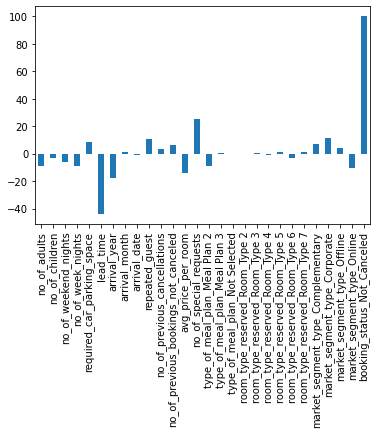

In [22]:
(df.corrwith(df['booking_status_Not_Canceled'])*100).plot(kind='bar')

In [23]:
df=df.rename({'booking_status_Not_Canceled':'booking_status'},axis=1)

In [24]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,booking_status
0,2,0,1,2,0,224,2017,10,2,0,...,0,0,0,0,0,0,0,1,0,1
1,2,0,2,3,0,5,2018,11,6,0,...,0,0,0,0,0,0,0,0,1,1
2,1,0,2,1,0,1,2018,2,28,0,...,0,0,0,0,0,0,0,0,1,0
3,2,0,0,2,0,211,2018,5,20,0,...,0,0,0,0,0,0,0,0,1,0
4,2,0,1,1,0,48,2018,4,11,0,...,0,0,0,0,0,0,0,0,1,0


In [25]:
df.duplicated().sum()

10275

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests',
       'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3',
       'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2',
       'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4',
       'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6',
       'room_type_reserved_Room_Type 7', 'market_segment_type_Complementary',
       'market_segment_type_Corporate', 'market_segment_type_Offline',
       'market_segment_type_Online', 'booking_status'],
      dtype='object')

### Checking outliers appear in average price column

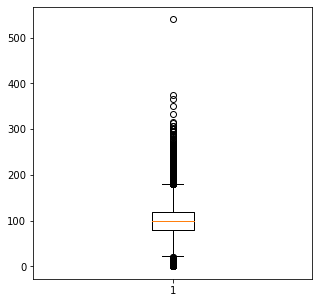

In [28]:
plt.figure(figsize=(5,5))
plt.boxplot(df['avg_price_per_room'])
plt.show()

### In the chart above, you can see outliers and below row we are creating a function to remove them.

In [36]:
def removeoutlier(col):
    sorted(col)
    q1, q2=col.quantile([0.25,0.75])
    IQR=q2-q1
    lr=q1-(1.5*IQR)
    ur=q2+(1.5*IQR)
    return lr,ur

In [37]:
lowscore,highscore=removeoutlier(df["avg_price_per_room"])
df["avg_price_per_room"]=np.where(df["avg_price_per_room"]>highscore,highscore,df["avg_price_per_room"])
df["avg_price_per_room"]=np.where(df["avg_price_per_room"]<lowscore,lowscore,df["avg_price_per_room"])

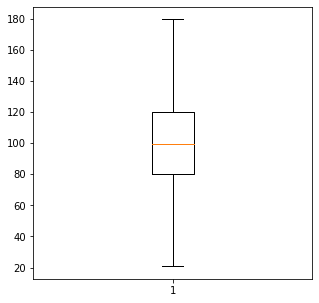

In [38]:
plt.figure(figsize=(5,5))
plt.boxplot(df['avg_price_per_room'])
plt.show()

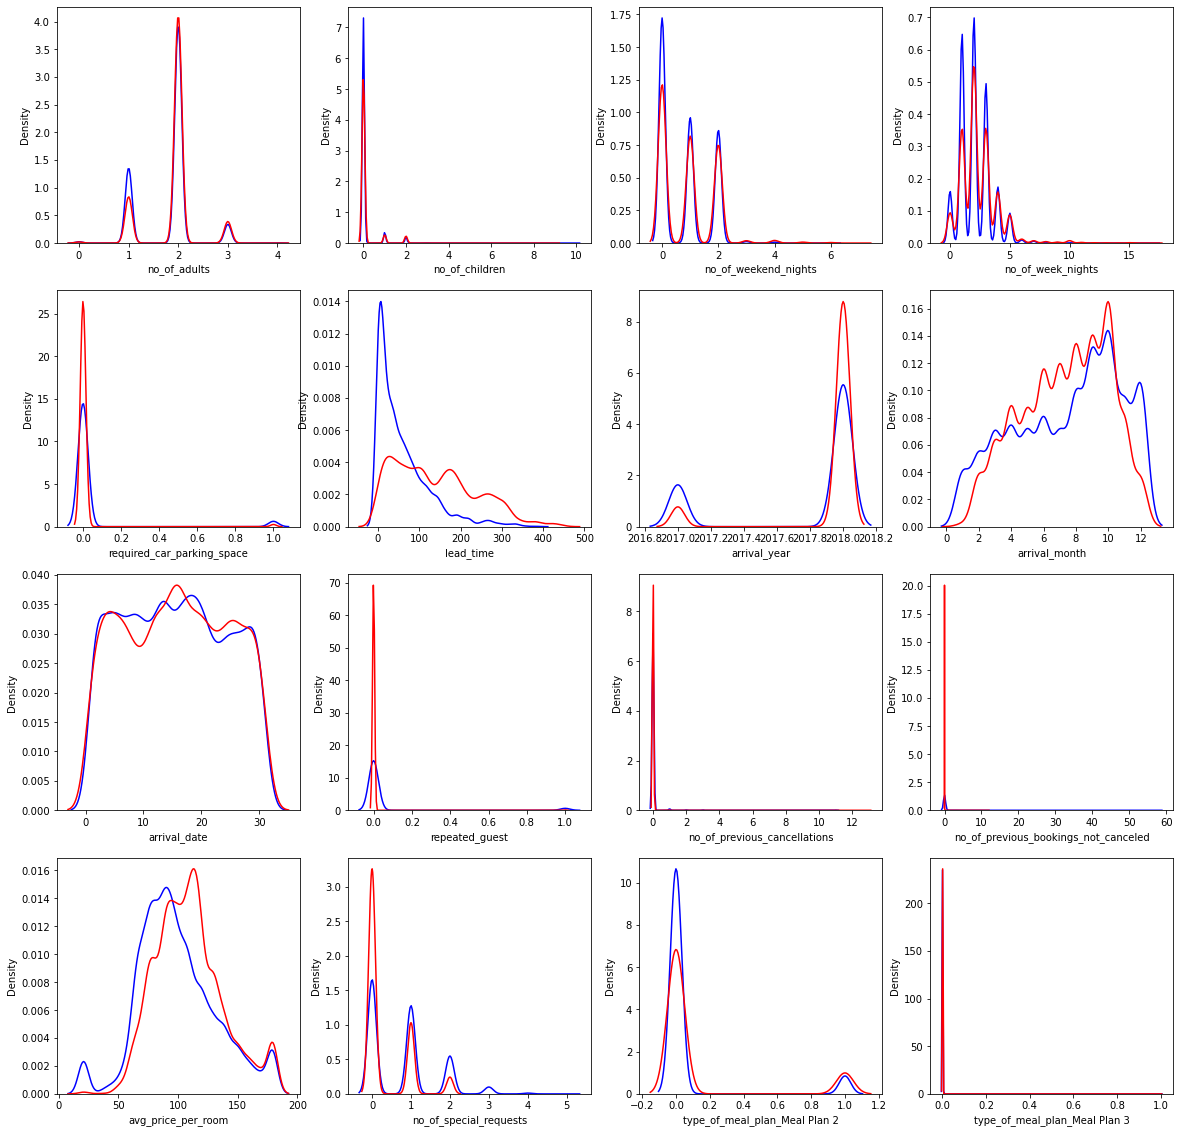

In [39]:
cols =['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests',
       'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3',
       'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2',
       'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4',
       'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6',
       'room_type_reserved_Room_Type 7', 'market_segment_type_Complementary',
       'market_segment_type_Corporate', 'market_segment_type_Offline',
       'market_segment_type_Online', 'booking_status']
plt.figure(figsize=(20,20))
for i in range (1,17):
    plt.subplot(4,4,i)
    sns.kdeplot(df[df['booking_status']==1][cols[i-1]],color='blue',warn_singular=False)
    sns.kdeplot(df[df['booking_status']==0][cols[i-1]],color='red',warn_singular=False)

In [30]:
df['no_of_week_nights'].value_counts()

2     11444
1      9488
3      7839
4      2990
0      2387
5      1614
6       189
7       113
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: no_of_week_nights, dtype: int64

In [31]:
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,booking_status
0,2,0,1,2,0,224,2017,10,2,0,...,0,0,0,0,0,0,0,1,0,1
1,2,0,2,3,0,5,2018,11,6,0,...,0,0,0,0,0,0,0,0,1,1
2,1,0,2,1,0,1,2018,2,28,0,...,0,0,0,0,0,0,0,0,1,0
3,2,0,0,2,0,211,2018,5,20,0,...,0,0,0,0,0,0,0,0,1,0
4,2,0,1,1,0,48,2018,4,11,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,85,2018,8,3,0,...,0,1,0,0,0,0,0,0,1,1
36271,2,0,1,3,0,228,2018,10,17,0,...,0,0,0,0,0,0,0,0,1,0
36272,2,0,2,6,0,148,2018,7,1,0,...,0,0,0,0,0,0,0,0,1,1
36273,2,0,0,3,0,63,2018,4,21,0,...,0,0,0,0,0,0,0,0,1,0


### Preparing data into model 

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
df_model = df
df_model

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,booking_status
0,2,0,1,2,0,224,2017,10,2,0,...,0,0,0,0,0,0,0,1,0,1
1,2,0,2,3,0,5,2018,11,6,0,...,0,0,0,0,0,0,0,0,1,1
2,1,0,2,1,0,1,2018,2,28,0,...,0,0,0,0,0,0,0,0,1,0
3,2,0,0,2,0,211,2018,5,20,0,...,0,0,0,0,0,0,0,0,1,0
4,2,0,1,1,0,48,2018,4,11,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,85,2018,8,3,0,...,0,1,0,0,0,0,0,0,1,1
36271,2,0,1,3,0,228,2018,10,17,0,...,0,0,0,0,0,0,0,0,1,0
36272,2,0,2,6,0,148,2018,7,1,0,...,0,0,0,0,0,0,0,0,1,1
36273,2,0,0,3,0,63,2018,4,21,0,...,0,0,0,0,0,0,0,0,1,0


In [43]:
data = df_model
target = df_model.pop('booking_status')

In [44]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224,2017,10,2,0,...,0,0,0,0,0,0,0,0,1,0
1,2,0,2,3,0,5,2018,11,6,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,2,1,0,1,2018,2,28,0,...,0,0,0,0,0,0,0,0,0,1
3,2,0,0,2,0,211,2018,5,20,0,...,0,0,0,0,0,0,0,0,0,1
4,2,0,1,1,0,48,2018,4,11,0,...,0,0,0,0,0,0,0,0,0,1


In [45]:
target.head()

0    1
1    1
2    0
3    0
4    0
Name: booking_status, dtype: int32

In [47]:
x_train, x_test, y_train, y_test = train_test_split(data,target, test_size=0.3)

print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_test shape: {y_test.shape}')

x_train shape: (25392, 27)
y_train shape: (25392,)
x_test shape: (10883, 27)
y_test shape: (10883,)


In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

x_train

array([[ 0.30281813, -0.25944132,  0.22310732, ..., -0.24311156,
        -0.63961004,  0.75108234],
       [-1.62187724, -0.25944132, -0.92694163, ..., -0.24311156,
        -0.63961004,  0.75108234],
       [-1.62187724, -0.25944132,  0.22310732, ..., -0.24311156,
        -0.63961004,  0.75108234],
       ...,
       [ 0.30281813, -0.25944132,  1.37315628, ..., -0.24311156,
        -0.63961004,  0.75108234],
       [-1.62187724, -0.25944132, -0.92694163, ..., -0.24311156,
         1.56345264, -1.33141195],
       [ 2.22751351, -0.25944132,  1.37315628, ..., -0.24311156,
         1.56345264, -1.33141195]])

### Logistic Regression model

In [50]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)

LogisticRegression()

In [51]:
y_pred = lr_model.predict(x_test)
y_pred[:50]

array([1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0])

In [52]:
y_prob = lr_model.predict_proba(x_test)
y_prob[:50]

array([[0.09329769, 0.90670231],
       [0.2308979 , 0.7691021 ],
       [0.83518207, 0.16481793],
       [0.9197998 , 0.0802002 ],
       [0.53009901, 0.46990099],
       [0.03048084, 0.96951916],
       [0.13938238, 0.86061762],
       [0.51936952, 0.48063048],
       [0.84013057, 0.15986943],
       [0.04918223, 0.95081777],
       [0.09806634, 0.90193366],
       [0.12755217, 0.87244783],
       [0.23018148, 0.76981852],
       [0.52941267, 0.47058733],
       [0.49512029, 0.50487971],
       [0.41040675, 0.58959325],
       [0.07971542, 0.92028458],
       [0.98346849, 0.01653151],
       [0.2285326 , 0.7714674 ],
       [0.23607885, 0.76392115],
       [0.77975521, 0.22024479],
       [0.18333565, 0.81666435],
       [0.36071733, 0.63928267],
       [0.92280968, 0.07719032],
       [0.70297352, 0.29702648],
       [0.26855129, 0.73144871],
       [0.76325243, 0.23674757],
       [0.06596383, 0.93403617],
       [0.02072618, 0.97927382],
       [0.05352758, 0.94647242],
       [0.

### Model evaluation

In [69]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

accuracy_score(y_test, y_pred)

0.8066709546999908

In [70]:
cm = confusion_matrix(y_test, y_pred) 
cm

array([[2257, 1322],
       [ 782, 6522]], dtype=int64)

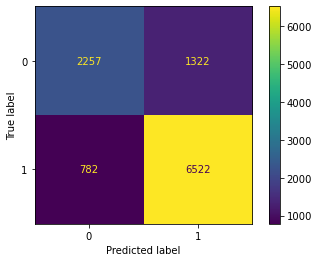

In [85]:
conf_matr = ConfusionMatrixDisplay(cm)
conf_matr.plot()

In [73]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.63      0.68      3579
           1       0.83      0.89      0.86      7304

    accuracy                           0.81     10883
   macro avg       0.79      0.76      0.77     10883
weighted avg       0.80      0.81      0.80     10883



### Decision Tree model

In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [77]:
tree_classifier = DecisionTreeClassifier()
param_grid_tree = {'max_depth':[1,2,3,4,5,6,7,8,9],
                  'criterion':['gini','entropy'],
                  'min_samples_leaf':[2,3,4,5,6,7,8,9,10]}
grid_search_tree = GridSearchCV(tree_classifier,param_grid_tree,scoring='accuracy',cv=5)
grid_search_tree.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [78]:
grid_search_tree.best_params_

{'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 3}

In [79]:
tree_model= DecisionTreeClassifier(criterion='gini', max_depth=9, min_samples_leaf=3)
tree_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=3)

In [80]:
y_pred_tree = tree_model.predict(x_test)
y_pred_tree[:50]

array([1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0])

In [81]:
accuracy_score(y_test, y_pred_tree)

0.8639161995773225

### Model evaluation

In [82]:
cm_tree = confusion_matrix(y_test,y_pred_tree)

In [83]:
cm_tree

array([[2741,  838],
       [ 643, 6661]], dtype=int64)

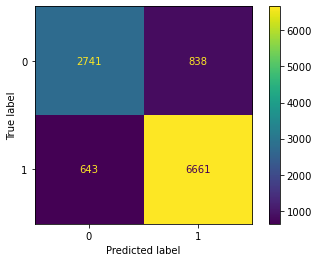

In [86]:
conf_matr_tree = ConfusionMatrixDisplay(cm_tree)
conf_matr_tree.plot()

In [87]:
print(classification_report(y_test,y_pred_tree))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79      3579
           1       0.89      0.91      0.90      7304

    accuracy                           0.86     10883
   macro avg       0.85      0.84      0.84     10883
weighted avg       0.86      0.86      0.86     10883

